In [59]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline

In [2]:
cd /Users/austinmcdonald/Desktop/data/eDrift/postive

/Users/austinmcdonald/Desktop/data/eDrift/postive


In [3]:
os.listdir()

['.DS_Store',
 'tek0000ALL.csv',
 'tek0001ALL.csv',
 'tek0002ALL.csv',
 'tek0003ALL.csv',
 'tek0004ALL.csv']

In [4]:
alldata = None
alldata = []
for files in glob.glob("*.csv"):
    alldata.append(files)
alldata

['tek0000ALL.csv',
 'tek0001ALL.csv',
 'tek0002ALL.csv',
 'tek0003ALL.csv',
 'tek0004ALL.csv']

In [31]:
%%time
FirstEtime = None
PeakEtime  = None
Area       = None
FirstEtime = []
PeakEtime  = []
Area       = []
data       = dict()
time       = dict()
volt       = dict()
ch1        = dict()
ch2        = dict()
leng       = len(alldata)
for x in range(0,leng):
    data[x] = pd.read_csv(alldata[x],delimiter=",",names=['time','ch1','ch2'],skiprows=22,low_memory=False,engine='c')
    ch1[x]  = 
    volt[x] = pd.to_numeric(data[x]['ch1'],errors='coerce') - pd.to_numeric(data[x]['ch2'],errors='coerce')
    time[x] = data[x]['time']
    
    data[x]['volt'] = pd.to_numeric(data[x]['ch1'],errors='coerce') - pd.to_numeric(data[x]['ch2'],errors='coerce')
    del data[x]['ch1']
    del data[x]['ch2']
 
    ArrivalCut = data[x][(data[x]['time']>6e-5) & (data[x]['time']<15e-5)] # Slice for the inital arrival
    ArrivalCutS=ArrivalCut.rolling(center=False,window=300).mean()         # smooths the cut curve
    init = ArrivalCutS['volt'].argmax()                                    #Finds the DF index for the max of the cut
    inital = ArrivalCutS['time'][init]                      # this is the time posistion for the cut aka arrival 
    FirstEtime.append(inital)
    
    AreaCut = data[x][(data[x]['time']>inital)]                       # Cuts the time with inital arrival 
    AreaCutS=AreaCut.rolling(center=False,window=300).mean().dropna() # smooths the plot
    peak = AreaCutS['volt'].argmin()
    Peak = AreaCutS['time'][peak]
    PeakEtime.append(Peak)
    
    area = integrate.trapz(AreaCutS['volt'], AreaCutS['time'])
    Area.append(area)

Volt=pd.DataFrame(volt)
Time=pd.DataFrame(time)
VoltSD=Volt.std(axis=1)
TimeSD=Time.std(axis=1)
VoltMean=Volt.mean(axis=1)
TimeMean=Time.mean(axis=1)
VoltSm=VoltMean.rolling(center=False,window=300).mean()
TimeSm=TimeMean.rolling(center=False,window=300).mean()

#Trace=pd.DataFrame({'Time Mean':TimeMean,'Time SD':TimeSD,'Volt Mean':VoltMean,'Volt SD':VoltSD,
#                    'VoltSm':VoltSm,'TimeSm':TimeSm,'FirstEtime':FirstEtime,'PeakEtime':PeakEtime,
#                    'Area':Area}, ignore_index=True)
    
    

CPU times: user 7.45 s, sys: 878 ms, total: 8.33 s
Wall time: 8.3 s


In [16]:
Trace=pd.DataFrame({'Time Mean':TimeMean,'Time SD':TimeSD,'Volt Mean':VoltMean,'Volt SD':VoltSD,
                    'VoltSm':VoltSm,'TimeSm':TimeSm})

In [32]:
Area

[-8.4497742986666502e-06,
 -7.0341122893331839e-06,
 -8.4832216519999735e-06,
 -6.8175355919999406e-06,
 -6.8808805600000629e-06]

In [42]:
FirstEtime1=pd.DataFrame({'First time':FirstEtime})
PeakEtime1 =pd.DataFrame({'Peak time':PeakEtime})
Area1      =pd.DataFrame({'Area':Area})

Trace2=pd.concat([Trace,FirstEtime1,PeakEtime1,Area1])


In [44]:
#Trace2.to_csv('testsave.csv')

In [6]:
Area

[-8.4497742986666502e-06,
 -7.0341122893331839e-06,
 -8.4832216519999735e-06,
 -6.8175355919999406e-06,
 -6.8808805600000629e-06]

In [10]:
PeakEtime

[0.00026833700000000439,
 0.00026033100000000443,
 0.00027641700000000444,
 0.0002633070000000044,
 0.00019528700000000156]

In [11]:
FirstEtime

[0.00011252500000000059,
 0.0001098150000000006,
 0.00011113100000000059,
 0.00010930700000000061,
 0.00011183300000000062]

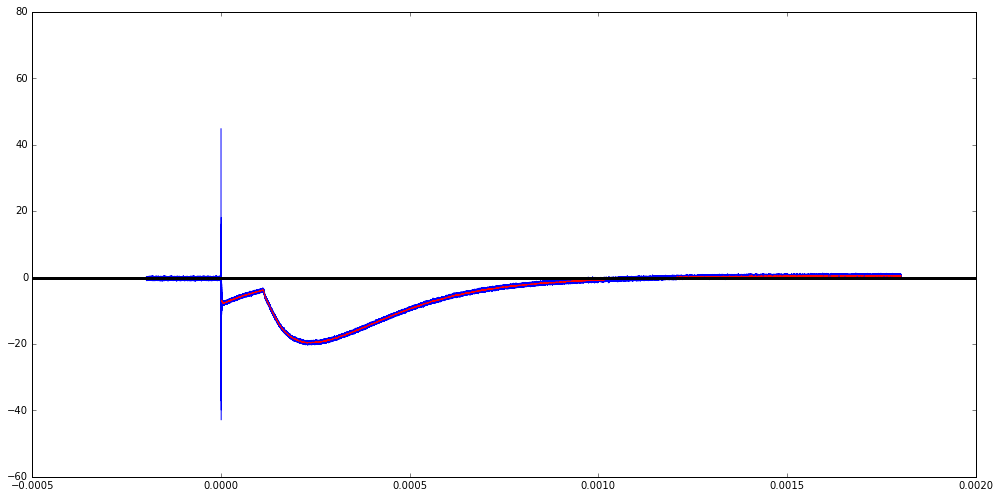

In [64]:
plt.figure(figsize=(14,7))
mili=1e-3

plt.plot(Trace['Time Mean'],Trace['Volt Mean']/mili)
plt.plot(Trace['TimeSm'],Trace['VoltSm']/mili ,color='r')

#plt.xlim(-2e-4,1.8e-3)
#plt.ylim(-2.2e-2,1e-2)
plt.axhline(y=0, color='k',linewidth=3)
#plt.axvline(x=0, color='k',linewidth=1)
plt.tight_layout()
plt.show()

In [69]:
areas = []
for x in range(0,leng):
    areas.append(area[x])
areas=np.array(areas)
meanarea  = float(sum(areas))/len(areas)   
SDarea  = np.std(areas)
print('Mean Area =',meanarea)
print('SD =',SDarea)

Mean Area = -1.1639244419707315e-06
SD = 1.74474478547e-07


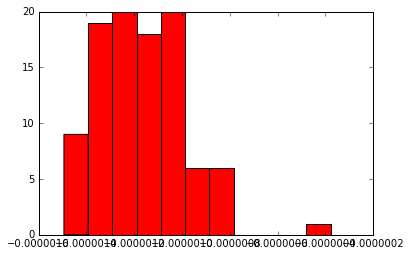

In [67]:

plt.hist(areas,11, color='r')

plt.show()

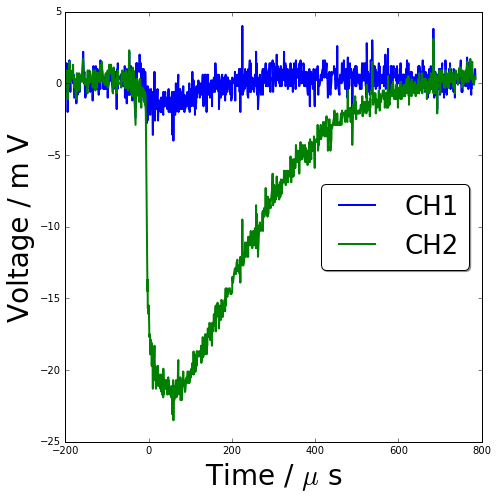

In [7]:
plt.figure(figsize=(7,7))

plt.plot(dataf[0]['Time']*1e6,dataf[0]['CH1']*1e3,label= 'CH1',linewidth=2)
plt.plot(dataf[0]['Time']*1e6,dataf[0]['CH2']*1e3,label= 'CH2',linewidth=2)

plt.xlabel(r'Time / $\mu$ s', fontsize=28)
plt.ylabel('Voltage / m V', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='center right',fontsize=26,shadow=True, fancybox=True)
#plt.xticks(fontsize = 26)
#plt.yticks(fontsize = 26)
#plt.xticks([450,475,500,525,550,575,600,625],ha='left')
#plt.tick_params(top="off",right='off')
#plt.tick_params(axis='x', direction='out',width=2,length=5)
##plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(-200,800)
#plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_Fluo4_ca_IF.pdf')
plt.show()
